In [1]:
library(tidyverse)

Warning message:
“replacing previous import by ‘tidyr::%>%’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::gather’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::spread’ when loading ‘broom’”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [47]:
source("~/src/JupyterRReuse/MultivarVis.R")
source("~/src/JupyterRReuse/EvalVis.R")

[1] "Loading module to 'multvis' and 'mv'"
[1] "Loading module to 'evalvis' and 'ev'"


In [51]:
ev$abundance_bars

function (data_m, title = "Sample abundances", color_col = NULL, 
    value_count = F, cond_order = F) 
{
    if (!value_count) {
        values <- colSums(data_m, na.rm = T)
    }
    else {
        values <- colSums(!is.na(data_m))
    }
    if (!is.null(color_col)) {
        plt_df <- data.frame(Sample = colnames(data_m), vals = values, 
            level = color_col)
        if (cond_order) {
            plt_df <- plt_df %>% arrange(level) %>% mutate(Sample = as.character(Sample))
            plt_df$Sample <- reorder(plt_df$Sample, as.numeric(plt_df$level))
        }
        plt <- ggplot(plt_df, aes(x = Sample, y = vals, fill = level)) + 
            geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, 
            hjust = 1)) + ggtitle(title)
    }
    else {
        plt_df <- data.frame(sample = colnames(data_m), vals = values)
        plt <- ggplot(plt_df, aes(x = sample, y = vals)) + geom_bar(stat = "identity") + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
            ggtitle(title)
    }
    if (!value_count) {
        plt <- plt + ylab("Total intensity")
    }
    else {
        plt <- plt + ylab("Total value count")
    }
    plt
}
<environment: 0x6e80970>

In [34]:
data_df <- read_tsv("expression_exploration/ExpressionExploration//data/bull_data.tsv")
design_df <- read_tsv("expression_exploration/ExpressionExploration//data/bull_design.tsv")


Parsed with column specification:
cols(
  .default = col_double(),
  `Protein IDs` = col_character(),
  `Majority protein IDs` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  sample = col_character(),
  samp_nbr = col_integer(),
  bull = col_character(),
  all_high_fert = col_character(),
  kviga_high_fert = col_character(),
  all_high_fert_val = col_double(),
  kviga_high_fert_val = col_double(),
  in_mid_range = col_character()
)


In [35]:
colnames(data_df)[which(!colnames(data_df) %in% design_df$sample)]

[1] "Protein IDs"          "Majority protein IDs"

In [46]:
mv$dendogram

function (data_m, samples, labels, color_levels, pick_top_variance = null, 
    title = "Dendogram") 
{
    expr_m_nona <- data_m[complete.cases(data_m), ]
    scaledTransposedMatrix <- scale(t(expr_m_nona), center = TRUE, 
        scale = TRUE)
    hc <- stats::hclust(stats::dist(scaledTransposedMatrix), 
        "ave")
    dhc <- as.dendrogram(hc)
    ddata <- dendro_data(dhc, type = "rectangle")
    cluster_label_order <- match(ddata$labels$label, samples)
    ddata$labels$color <- color_levels[cluster_label_order]
    ddata$labels$label <- labels[cluster_label_order]
    plt <- ggplot(segment(ddata)) + geom_segment(aes(x = x, y = y, 
        xend = xend, yend = yend)) + theme_dendro() + geom_text(data = label(ddata), 
        aes(x = x, y = y, label = label, color = color), vjust = 0.5, 
        hjust = 0, size = 3) + coord_flip() + scale_y_reverse(expand = c(0.2, 
        0)) + scale_x_continuous(expand = c(0, 1)) + ggtitle(title)
    plt
}
<environment: 0x5cf6dc0>

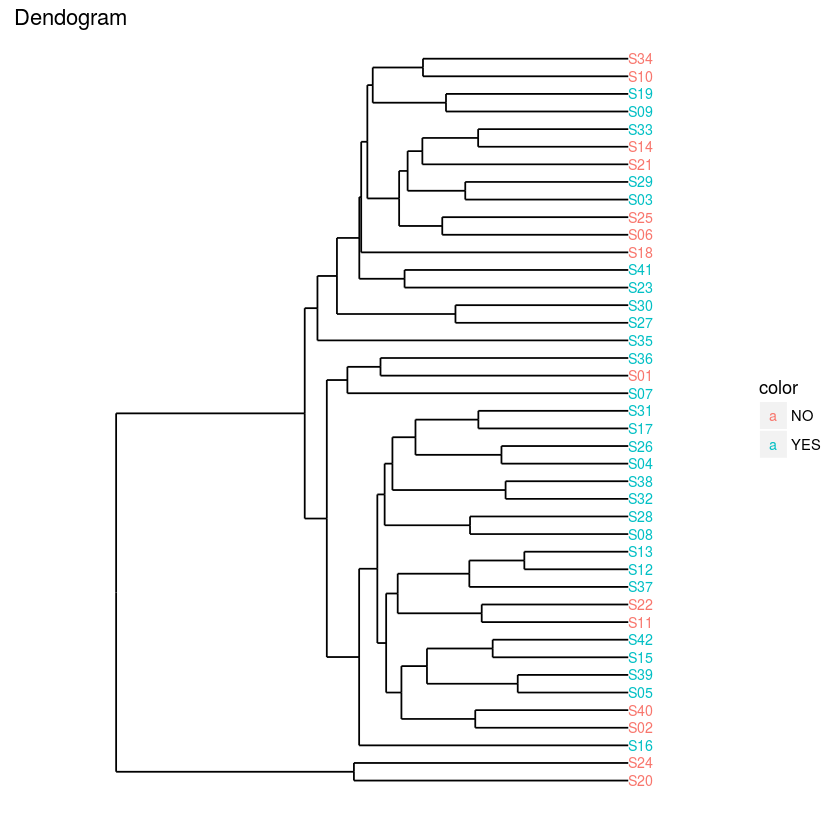

In [42]:
mv$dendogram(sample_df, design_df$sample, design_df$sample, design_df$all_high_fert)

In [43]:
mv$pca

function (data_m, color_levels, samples, custom_names, color_count = NULL, 
    pc1 = 1, pc2 = 2, legend = T, title_app = "", cont_scale = F, 
    shape_levels = NULL, only_text = T, verbose = F) 
{
    if (verbose) {
        print("data_m")
        print(head(data_m))
        print("design_m")
        print(head(design_m))
        print(paste("pc1", pc1))
        print(paste("pc2", pc2))
        print(paste("color_factor", color_factor))
        print(paste("colors", colors))
        print(paste("legend", legend))
        print(paste("title_app", title_app))
        print(paste("cont_scale", cont_scale))
        print(paste("shape_factor", shape_factor))
        print(paste("only_text", only_text))
    }
    if (cont_scale) {
        getPalette <- colorRampPalette(RColorBrewer::brewer.pal(9, 
            "Set1"))
    }
    if (is.null(colors)) {
        color_count <- length(unique(color_levels))
    }
    design_m <- data.frame(sample = samples, color = color_levels)
    title <- paste0("PCA, PC", pc1, " vs PC", pc2, " ", title_app)
    plt <- self$make_expression_pca(data_m, design_m, color_factor = "color", 
        title = title, pca_axis1 = pc1, pca_axis2 = pc2, show_labels = T, 
        only_text = only_text, color_text = T, custom_names = custom_names, 
        label_size = 2, shape_factor = shape_levels)
    if (cont_scale) {
        plt <- plt + scale_color_manual(values = getPalette(colors))
    }
    if (!legend) {
        plt <- plt + theme(legend.position = "none")
    }
    plt
}
<environment: 0x5cf6dc0>

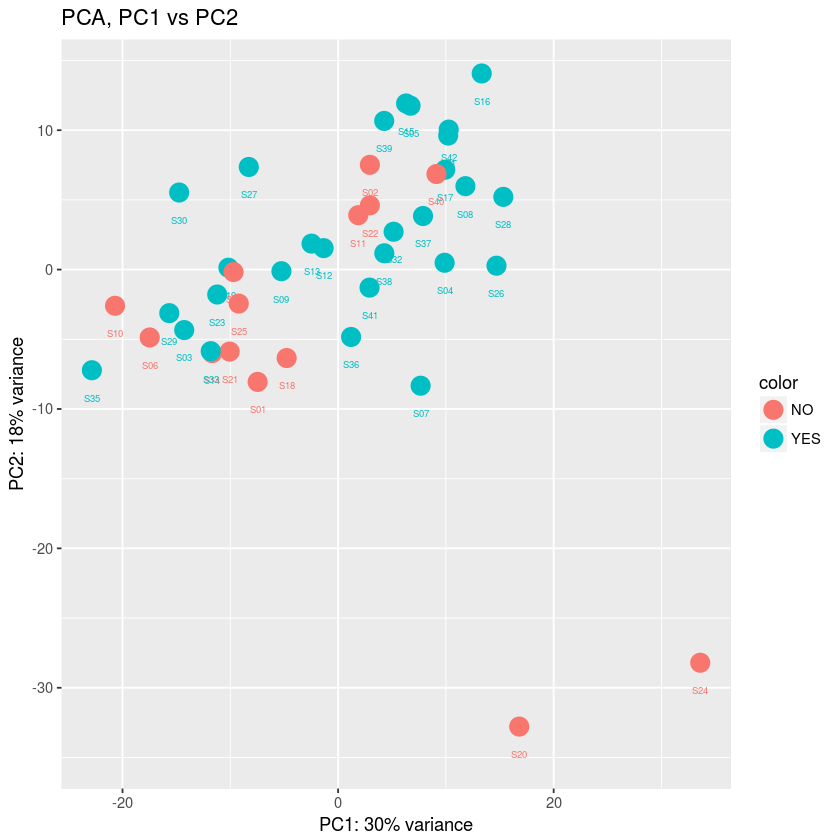

In [44]:
sample_df <- data_df[, design_df$sample]
mv$pca(sample_df, design_df$all_high_fert, design_df$sample, design_df$sample, only_text=F)

In [36]:
glimpse(design_df)

Observations: 42
Variables: 8
$ sample              <chr> "S01", "S02", "S03", "S04", "S05", "S06", "S07"...
$ samp_nbr            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ...
$ bull                <chr> "Galant", "Numero", "Speedy", "Borat", "Basudan...
$ all_high_fert       <chr> "NO", "NO", "YES", "YES", "YES", "NO", "YES", "...
$ kviga_high_fert     <chr> "NO", "YES", "YES", NA, "YES", "NO", "YES", "YE...
$ all_high_fert_val   <dbl> 39.1, 40.6, 66.7, 52.6, 57.4, 34.5, 56.2, 57.3,...
$ kviga_high_fert_val <dbl> 50.0, 81.0, 87.0, NA, 71.4, 51.8, 76.5, 81.3, 7...
$ in_mid_range        <chr> "NO", "NO", "NO", "NO", "NO", "NO", "NO", "NO",...


In [37]:
glimpse(data_df)

Observations: 1,110
Variables: 44
$ `Protein IDs`          <chr> "Q56J78|Q56J78_BOVIN;F1MMW8|F1MMW8_BOVIN;A0A...
$ `Majority protein IDs` <chr> "Q56J78|Q56J78_BOVIN;F1MMW8|F1MMW8_BOVIN;A0A...
$ S01                    <dbl> 20.58044, NA, 20.73793, 19.89583, 17.02213, ...
$ S02                    <dbl> NA, NA, 20.73843, NA, NA, 26.09065, 19.60695...
$ S03                    <dbl> NA, NA, 20.40941, NA, NA, 26.86506, 21.15781...
$ S04                    <dbl> NA, NA, 20.22782, 19.23612, NA, 24.70535, 20...
$ S05                    <dbl> NA, NA, 19.12194, NA, NA, 23.98497, 18.41724...
$ S06                    <dbl> 18.13740, NA, 20.99079, NA, NA, 26.16666, 21...
$ S07                    <dbl> 19.45939, NA, 22.39194, 21.47710, 18.81876, ...
$ S08                    <dbl> NA, NA, 19.69231, NA, NA, 26.49150, 20.74524...
$ S09                    <dbl> NA, NA, 19.61289, 18.76347, 19.49892, 25.873...
$ S10                    <dbl> 16.62100, NA, 20.20358, NA, 17.99362, 25.926...
$ S11             